This is the first project to address the problem of simulating a motor race.

In this project I will start with a simple model and use it to determine the optimum lap for a competitor to replace their tyres.

The assumptions of the model are:

1. The aim is to complete the race in the shortest time.
2. Lap time is affected by tyre wear and fuel load.
3. Tyre wear is affected by fuel load. Tyre wear is higher when the car is heavier (has greater fuel load).
4. Other competitors are ignored. Hence slower cars and overtaking are not considered.
5. There will be one (and only one) pitstop to change tyres.
6. The time lost during a pit stop is a constant (including slowing down, stop and getting up to speed). 

Total race time is the sum of all the lap times plus the duration of a pitstop (which is assumed to be a constant).
Lap time is affected by the current fuel load and the current tyre condition.

The variables are:

race_time = the total race time for the competitor

lap_time = the lap time for the current lap, a function of nominal_lap_time, fuel_factor and tyre_wear_factor

tyre_wear = a cumulative measure of current tyre condition, a function of lap count and fuel_factor

pit_lap = the lap on which the car stops for new tyres

The parameters are:

N = total number of laps in the race

nominal_lap_time = the theoretical lap time for a car with no fuel load and new tyres

max_fuel_penalty = the proportional increase in lap time over the nominal_lap_time for a full fuel load

max_tyre_life = the maximum number of laps a set of tyres will last

fuel_factor = a function of N, current lap number (n) and max_fuel_penalty

tyre_wear_factor = a function of N and current lap number (n)

pitstop_time = the time spent in the pits at a stop


In [1]:
# import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# define the parameters
N = 40 ## the race has 40 laps
nominal_lap_time = 120 ## the nominal lap time for a car is 120 seconds
max_fuel_penalty = 0.1 ## a car with a full fuel load for the race distance is 10% slower than the nominal lap time
max_tyre_life = 50 ## a set of tyres could theoretically last 50 laps
pit_lap = 20 ## the car will stop on lap 20 for new tyres
pitstop_time = 25 ## the pit stop will add 25 seconds to the lap_time / race_time

In [3]:
# define a function to calculate the fuel factor
def calc_fuel_factor(N, n, max_fuel_penalty):
    fuel_factor = 1 + (((N - n) / N) * max_fuel_penalty)
    return fuel_factor

In [6]:
# investigate the fuel_factor
fuel_factor_list = []

for i in range(N):
    fuel_factor = calc_fuel_factor(N, i, max_fuel_penalty)
    fuel_factor_list.append(fuel_factor)

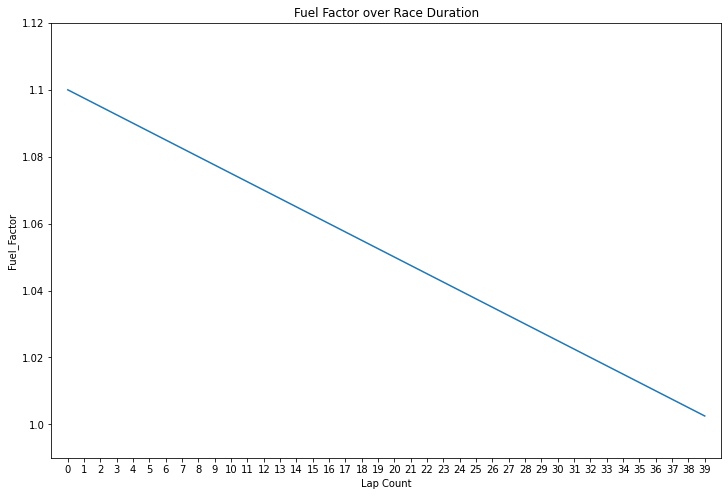

In [9]:
# plot the fuel_factor for race duration
tick_list = [1.12, 1.1, 1.08, 1.06, 1.04, 1.02, 1.0]

plt.figure(figsize=(12, 8))

plt.plot(range(N), fuel_factor_list)
plt.axis([-1, 40, 0.99, 1.12])
plt.xlabel('Lap Count')
plt.ylabel('Fuel_Factor')
plt.title('Fuel Factor over Race Duration')
plt.xticks(range(N), range(N))
plt.yticks(tick_list, tick_list)

plt.show()

As can be seen the fuel_factor decreases at a constant rate as lap count increases.

In [7]:
# function replaced - tyre wear variable introduced
# define a function to calculate the tyre_wear_factor
# def calc_tyre_wear_factor(pit_lap, n, max_tyre_life):
    
    # calculate tyre_wear_factor for laps upto and including pit_lap
    # if n <= pit_lap:
        # tyre_wear_factor = 1 + (n / max_tyre_life) ** 2
    
    # calculate tyre_wear_factor for laps after pit lap
    # else:
        # tyre_wear_factor = 1 + ((n - (pit_lap + 1)) / max_tyre_life) ** 2
    
    # return tyre_wear_factor

In [52]:
# function replaced - tyre wear variable calculated in race_sim function
# define an alternative function to calculate the tyre_wear_factor
# def calc_tyre_wear_factor(pit_lap, N, n, max_tyre_life, max_fuel_penalty):
    
    # define tyre_wear
    # tyre_wear = 0
    
    # calculate current tyre_wear for laps upto and including pit_lap
    # if n <= pit_lap:
    
        # for i in range(n):
            # tyre_wear += 1 + (((N - i) / N) * max_fuel_penalty)
        
    # calculate current tyre_wear for laps after pit lap
    # else:
        
        # for i in range(n - (pit_lap + 1)):
            # tyre_wear += 1 + (((N - (i + pit_lap + 1)) / N) * max_fuel_penalty)
    
    # calculate tyre_wear_factor
    # tyre_wear_factor = 1 + (tyre_wear / max_tyre_life) ** 2
    
    # return tyre_wear_factor

In [10]:
# define an alternative function to calculate the tyre_wear_factor
def calc_tyre_wear_factor(tyre_wear, max_tyre_life):
    
    # calculate tyre_wear_factor
    tyre_wear_factor = 1 + (tyre_wear / max_tyre_life) ** 2
    
    return tyre_wear_factor

In [11]:
# investigate the tyre_wear_factor

# create list to store tyre_wear_factors
tyre_wear_factor_list = []

# define a tyre_wear variable
# tyre_wear will be calculated and stored within the race_sim function
tyre_wear = 0

for i in range(N):
    # allow for replacing tyres at pit stop
    if i == (pit_lap + 1):
        tyre_wear = 0
        
    # add to tyre_wear for each lap
    else:
        tyre_wear += fuel_factor_list[i]
    tyre_wear_factor = calc_tyre_wear_factor(tyre_wear, max_tyre_life)
    tyre_wear_factor_list.append(tyre_wear_factor)

In [12]:
tyre_wear_factor_list

[1.000484,
 1.0019316025,
 1.0043362225,
 1.00769129,
 1.01199025,
 1.0172265625,
 1.0233937025,
 1.03048516,
 1.03849444,
 1.0474150625,
 1.0572405625,
 1.06796449,
 1.07958041,
 1.0920819025,
 1.1054625625,
 1.119716,
 1.13483584,
 1.1508157225,
 1.1676493025,
 1.18533025,
 1.20385225,
 1.0,
 1.00043681,
 1.0017430625,
 1.0039125025,
 1.00693889,
 1.010816,
 1.0155376225,
 1.0210975625,
 1.02748964,
 1.03470769,
 1.0427455625,
 1.0515971225,
 1.06125625,
 1.0717168400000001,
 1.0829728025,
 1.0950180625000001,
 1.10784656,
 1.12145225,
 1.1358291025]

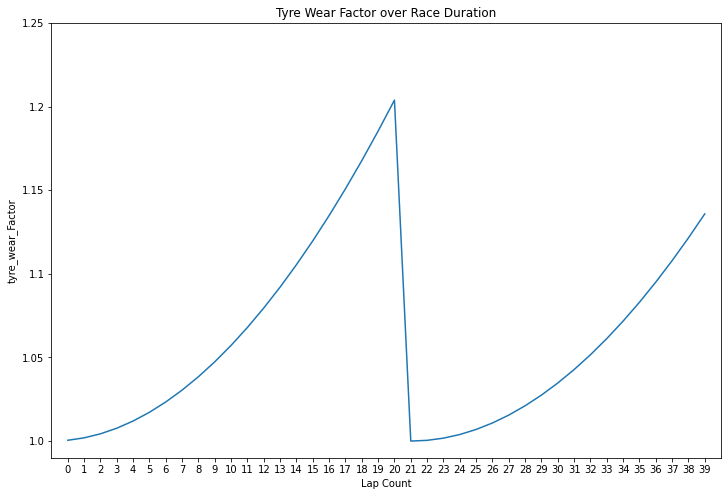

In [13]:
# plot the tyre_wear_factor over the duration of a race
tick_list = [1.0, 1.05, 1.10, 1.15, 1.20, 1.25]

plt.figure(figsize=(12, 8))

plt.plot(range(N), tyre_wear_factor_list)
plt.axis([-1, 40, 0.99, 1.25])
plt.xlabel('Lap Count')
plt.ylabel('tyre_wear_Factor')
plt.title('Tyre Wear Factor over Race Duration')
plt.xticks(range(N), range(N))
plt.yticks(tick_list, tick_list)

plt.show()

As can be seen tyre_wear_factor inreases as lap count increases, also the rate of increase is increasing. The tyre_wear_factor is reset at the pit stop lap. 

In [31]:
# function replaced - tyre_wear variable introduced
# define a function to simulate a race
# def race(pit_lap, N, nominal_lap_time, max_fuel_penalty, max_tyre_life, pitstop_time):
    
    # set lap count
    # n = 0
    
    # create list to store lap times
    # lap_times = []
    
    # iterate for each lap until race complete
    # while n < N:
        
        # calculate the current fuel_factor
        # fuel_factor = calc_fuel_factor(N, n, max_fuel_penalty)
        
        # calculate the current tyre_wear_factor
        # tyre_wear_factor = calc_tyre_wear_factor(pit_lap, N, n, max_tyre_life, max_fuel_penalty)
        
        # allow for pit stop
        # if n == pit_lap:
            # stop = pitstop_time
        
        # else:
            # stop = 0
        
        # calculate lap time
        # lap_time = (nominal_lap_time * fuel_factor * tyre_wear_factor) + stop
        
        # append lap time to list
        # lap_times.append(lap_time)
            
        # increase lap count
        # n += 1
    
    # return total lap time and lap_times
    # return sum(lap_times), lap_times

In [14]:
# define an alternative function to simulate a race - incorporating tyre wear
def race_sim(pit_lap, N, nominal_lap_time, max_fuel_penalty, max_tyre_life, pitstop_time):
    
    # set lap count
    n = 0
    
    # set tyre_wear
    tyre_wear = 0
    
    # create list to store lap times
    lap_times = []
    
    # iterate for each lap until race complete
    while n < N:
        
        # calculate the current fuel_factor
        fuel_factor = calc_fuel_factor(N, n, max_fuel_penalty)
        
        # calculate the current tyre_wear
        # allow for replacing tyres at pit stop
        if n == (pit_lap + 1):
            tyre_wear = 0
        
        # add to tyre_wear for each lap
        else:
            tyre_wear += fuel_factor
        
        # calculate the current tyre_wear_factor
        tyre_wear_factor = calc_tyre_wear_factor(tyre_wear, max_tyre_life)
        
        # allow for pit stop
        if n == pit_lap:
            stop = pitstop_time
        
        else:
            stop = 0
        
        # calculate lap time
        lap_time = (nominal_lap_time * fuel_factor * tyre_wear_factor) + stop
        
        # append lap time to list
        lap_times.append(lap_time)
            
        # increase lap count
        n += 1
    
    # return total lap time and lap_times
    return sum(lap_times), lap_times

In [16]:
race_time, lap_times = race_sim(20, 40, 120, 0.1, 50, 25)

race_time

5376.889647095501

In [17]:
lap_times

[132.063888,
 131.95439204925,
 131.96977963650002,
 132.108328119,
 132.36832470000002,
 132.74806640625002,
 133.24586006549998,
 133.860022284,
 134.58887942400003,
 135.43076758125002,
 136.3840325625,
 137.44702986299998,
 138.618124644,
 139.89569171025,
 141.2781154875,
 142.76379,
 144.351118848,
 146.03851518525,
 147.82440169650002,
 149.707210575,
 176.6853835,
 125.70000000000002,
 125.454775974,
 125.31805711874998,
 125.28828031200001,
 125.36389180500002,
 125.54334719999999,
 125.82511142774997,
 126.20765872500002,
 126.689472612,
 127.26904587,
 127.94488051874998,
 128.715487794,
 129.579388125,
 130.535111112,
 131.58119550375,
 132.716189175,
 133.938649104,
 135.24714135,
 136.64024103075]

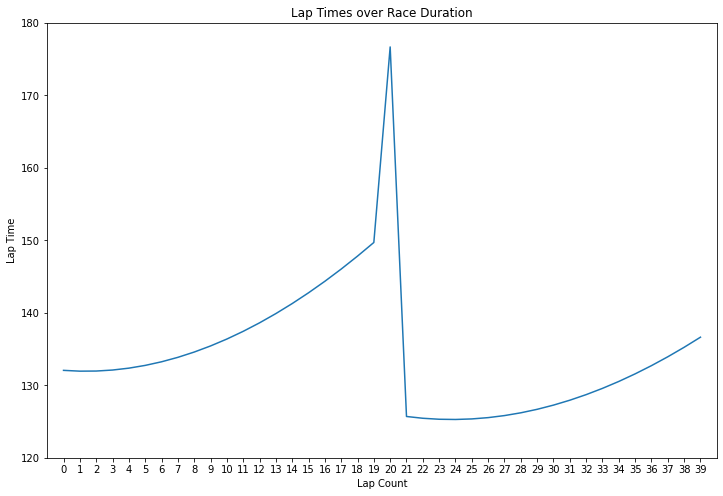

In [18]:
# plot lap times over the duration of a race
plt.figure(figsize=(12, 8))

plt.plot(range(N), lap_times)
plt.axis([-1, 40, 120, 180])
plt.xlabel('Lap Count')
plt.ylabel('Lap Time')
plt.title('Lap Times over Race Duration')
plt.xticks(range(N), range(N))

plt.show()

We see that initially lap time decreases slightly as the reduction in the fuel_factor more than offsets the increase in the tyre_wear_factor. At lap 3 the lap_time begins to increase. The rate of change increases as the lap count increases.

Lap 20 time includes the pit stop.

After the pit stop the same pattern is repeated. Initially lap time decreases before increasing again as the tyre_wear_factor increases at a greater rate than the fuel_factor decreases.

In [21]:
# define a function to iterate through possible pit_lap values and return a list of race_times
def iterate_race(N, nominal_lap_time, max_fuel_penalty, max_tyre_life, pitstop_time):
    
    # create list to store race_times
    race_time_list = []
    
    # iterate through possible pit_lap values
    for i in range(N):
        race_time, lap_times = race_sim(i, N, nominal_lap_time, max_fuel_penalty, max_tyre_life, pitstop_time)
        
        # append race_time to list
        race_time_list.append(race_time)
        
    # return list of race_times
    return race_time_list

In [22]:
race_time_list = iterate_race(40, 120, 0.1, 50, 25)

In [23]:
race_time_list

[6123.528988940499,
 6040.40182184275,
 5962.2892577785,
 5889.158646275499,
 5820.9774092755,
 5757.71304114175,
 5699.3331086665,
 5645.8052510785,
 5597.097180050501,
 5553.176679706748,
 5514.011606630502,
 5479.569889871499,
 5449.8195309535,
 5424.728603881749,
 5404.2652551505,
 5388.397703750501,
 5377.0942411765,
 5370.32323143475,
 5368.053111050502,
 5370.252389075501,
 5376.889647095501,
 5387.93353923775,
 5403.352792178501,
 5423.1162051505,
 5447.192649950499,
 5475.551070946751,
 5508.160485086501,
 5544.989981903502,
 5586.0087235255005,
 5631.18594468175,
 5680.490952710501,
 5733.893127566502,
 5791.361921828501,
 5852.866860706751,
 5918.377542050501,
 5987.863636355501,
 6061.2948867715,
 6138.641109109751,
 6219.872191850501,
 6304.958096150501]

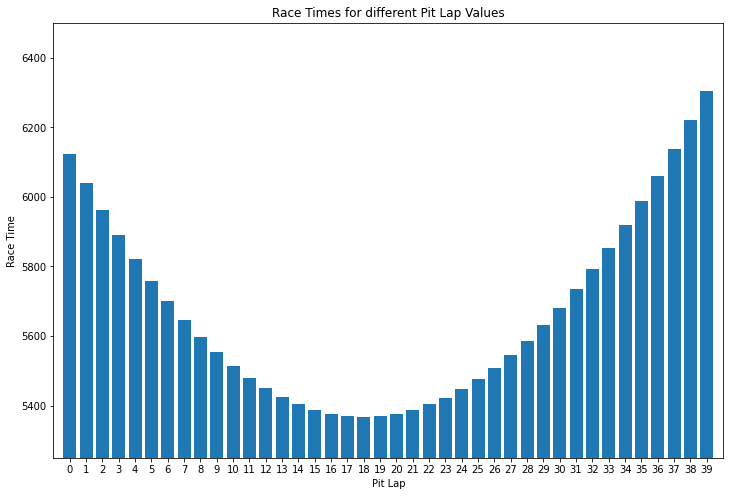

In [24]:
# plot race times for different pit_lap values
plt.figure(figsize=(12, 8))

plt.bar(range(N), race_time_list)
plt.axis([-1, 40, 5250, 6500])
plt.xlabel('Pit Lap')
plt.ylabel('Race Time')
plt.title('Race Times for different Pit Lap Values')
plt.xticks(range(N), range(N))

plt.show()

We see the optimum lap for the pit stop is after 18 laps are complete (so on the ninetenth lap) which roughly corresponds to the intuitive expectation. As tyre wear increases at an increasing rate limiting the length of each stint to about 20 laps is the best solution. The optimal solution is actually a lap earlier than the midpoint of the race due to the effect of the fuel_factor on tyre wear.

The penalty for stopping a lap earlier or a lap later is only approximately 2 seconds.

To investigate whether the other parameters have an effect on the optimal pit lap we can try different values for max_fuel_penalty and max_tyre_life. 

In [27]:
# iterate for different max_fuel_penalty and max_tyre_life values

# create a dictionary to store optimum pit_lap for each iteration
opt_pit_lap_dict = {}

# iterate through list of max_fuel_penalty
for fuel_pen in [0.1, 0.2, 0.3, 0.4, 0.5]:
    
    # create list to store opt_pit_lap for each fuel_pen value
    opt_pit_lap_list = []
    
    # iterate through list of max_tyre_life
    for tyre_life in [20, 30, 40, 50, 60, 70, 80]:
        
        # run iteration for each pit_lap value
        race_time_list = iterate_race(40, 120, fuel_pen, tyre_life, 25)
        
        # save index of optimum pit_lap / minimum race time
        opt_pit_lap = race_time_list.index(min(race_time_list))
        
        # append opt_pit_lap to list
        opt_pit_lap_list.append(opt_pit_lap)
        
    # add opt_pit_lap_list to opt_pit_lap_dict
    opt_pit_lap_dict[fuel_pen] = opt_pit_lap_list

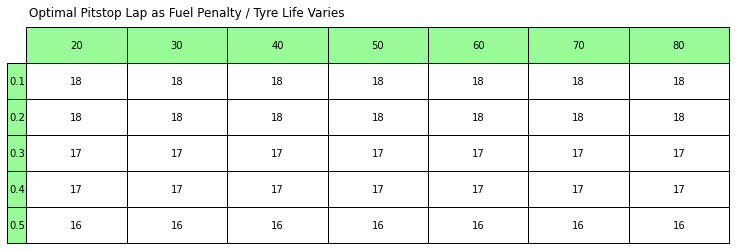

In [67]:
# plot results as a table
fig, ax = plt.subplots()

ax.set_axis_off()
table = ax.table(cellText=list(opt_pit_lap_dict.values()),
                 rowLabels=[0.1, 0.2, 0.3, 0.4, 0.5],
                 colLabels=[20, 30, 40, 50, 60, 70, 80],
                 rowColours=['palegreen'] * 5,
                 colColours=['palegreen'] * 7,
                 colWidths=[0.1] * 7,
                 fontsize=5,
                 cellLoc='center',
                 loc='upper left')

ax.set_title('Optimal Pitstop Lap as Fuel Penalty / Tyre Life Varies')
table.scale(3, 3)

plt.show()

We see that as the max_fuel_penalty increases the optimal solution is to stop earlier to change tyres. The increased tyre wear associated with a high fuel load makes it advantageous to change tyres sooner. 

Also we see that max_tyre_life does not affect the optimal strategy.

Notes on model

Possible developments and improvements